In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter

### Load the Wine Dataset 🍷

In [65]:
wine = load_wine()
X = wine.data
y = wine.target
wine.target_names.tolist()

['class_0', 'class_1', 'class_2']

### ✂️ Split into Train & Test

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### 🛠️ Custom KNN Classifier

In [ ]:
class CustomKNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        return np.array([self.predict_single(x) for x in X])

    def predict_single(self, x):
        distances = self._uclidean_distances(x)
        neighbors = self.get_k_neighbors(distances)
        return self.majority_vote(neighbors)

    def euclidean_distances(self, x):
        return np.linalg.norm(self.X_train - x, axis=1)

    def get_k_neighbors(self, distances):
        k_indices = np.argsort(distances)[:self.k]
        return self.y_train[k_indices]

    def majority_vote(self, neighbors):
        most_common = Counter(neighbors).most_common(1)
        return most_common[0][0]

### Train & Predict with Custom KNN

In [68]:
custom_knn = CustomKNN(k=3)
custom_knn.fit(X_train, y_train)
custom_preds = custom_knn.predict(X_test)

###  Sklearn KNN

In [69]:
sklearn_knn = KNeighborsClassifier(n_neighbors=3)
sklearn_knn.fit(X_train, y_train)
sklearn_preds = sklearn_knn.predict(X_test)

### 📊 Accuracy Scores

In [70]:
custom_acc = accuracy_score(y_test, custom_preds)
sklearn_acc = accuracy_score(y_test, sklearn_preds)
print(f"Custom KNN Accuracy: {custom_acc:.4f}")
print(f"Sklearn KNN Accuracy: {sklearn_acc:.4f}")

Custom KNN Accuracy: 0.8333
Sklearn KNN Accuracy: 0.8333


###  Visualize Results

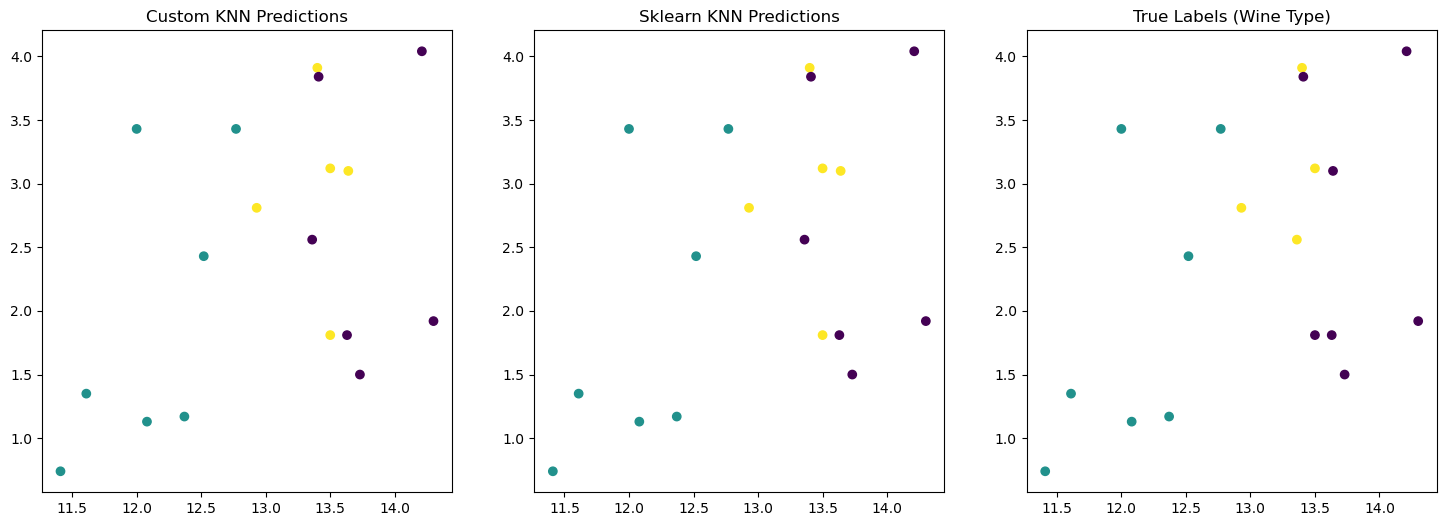

In [71]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=custom_preds, cmap='viridis')
plt.title('Custom KNN Predictions')

plt.subplot(1, 3, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=sklearn_preds, cmap='viridis')
plt.title('Sklearn KNN Predictions')

plt.subplot(1, 3, 3)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis')
plt.title('True Labels (Wine Type)')

plt.show()